In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import numpy as np
import random

In [2]:
import pandas as pd

df = pd.read_csv("the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data.csv")

In [3]:
patient_id = list(df["Patient ID"])
recording_loc = list(df["Recording locations:"])
murmur = list(df["Murmur"])
murmur_loc = list(df["Murmur locations"])
systolic_murmur_timing = list(df["Systolic murmur timing"])

In [4]:
recording_loc = [x.split("+") for x in recording_loc]

for i in range(len(murmur_loc)):
    if murmur_loc[i] is np.nan:
        murmur_loc[i] = []
    else:
        murmur_loc[i] = murmur_loc[i].split("+")

In [5]:
X = []
y = []

for i in range(len(patient_id)):
    if murmur[i] == "Absent":
        for recloc in recording_loc[i]:
            full_recording = np.loadtxt("SSE/" + str(patient_id[i]) + "_" + recloc + "_features.csv", delimiter=',')
            initial = 0
            while (initial+400) <= len(full_recording):
                X.append(full_recording[initial:initial+400])
                y.append([1, 0, 0, 0, 0])
                initial += 200
    elif murmur[i] == "Present":
        for recloc in recording_loc[i]:
            if recloc in murmur_loc[i]:
                full_recording = np.loadtxt("SSE/" + str(patient_id[i]) + "_" + recloc + "_features.csv", delimiter=',')
                initial = 0
                if systolic_murmur_timing[i] == "Holosystolic":
                    while (initial+400) <= len(full_recording):
                        X.append(full_recording[initial:initial+400])
                        y.append([0, 1, 0, 0, 0])
                        initial += 200
                elif systolic_murmur_timing[i] == "Early-systolic":
                    while (initial+400) <= len(full_recording):
                        X.append(full_recording[initial:initial+400])
                        y.append([0, 0, 1, 0, 0])
                        initial += 200
                elif systolic_murmur_timing[i] == "Mid-systolic":
                    while (initial+400) <= len(full_recording):
                        X.append(full_recording[initial:initial+400])
                        y.append([0, 0, 0, 1, 0])
                        initial += 200
                elif systolic_murmur_timing[i] == "Late-systolic":
                    while (initial+400) <= len(full_recording):
                        X.append(full_recording[initial:initial+400])
                        y.append([0, 0, 0, 0, 1])
                        initial += 200
                else:
                    print("Error on patient ID:", patient_id[i])
            else:
                full_recording = np.loadtxt("SSE/" + str(patient_id[i]) + "_" + recloc + "_features.csv", delimiter=',')
                initial = 0
                while (initial+400) <= len(full_recording):
                    X.append(full_recording[initial:initial+400])
                    y.append([1, 0, 0, 0, 0])
                    initial += 200

Error on patient ID: 85119
Error on patient ID: 85119


In [6]:
time_steps = 400
feature_length = 18
batch_size = 3

In [7]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.25)

In [8]:
X_train_final = []
y_train_final = []

for i in range(len(X_train)):
    if y_train[i] == [1, 0, 0, 0, 0]:
        #randnum = random.uniform(0, 1)
        randnum = random.random()
        if randnum >= 0.66:
            X_train_final.append(X_train[i])
            y_train_final.append(y_train[i])
    else:
        X_train_final.append(X_train[i])
        y_train_final.append(y_train[i])

In [9]:
print(len(X_train), len(y_train))
print(len(X_train_final), len(y_train_final))
print(len(X_test), len(y_test))

22341 22341
10166 10166
7447 7447


In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train_final = np.array(X_train_final)
y_train_final = np.array(y_train_final)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [11]:
model = Sequential()
model.add(LSTM(256, input_shape = (400, 18), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 400, 256)          281600    
_________________________________________________________________
dropout (Dropout)            (None, 400, 256)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 400, 128)          197120    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 528,453
Trainable params: 528,453
Non-trainable params: 0
__________________________________________________

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(X_train_final, y_train_final, epochs=10, batch_size=batch_size)

Epoch 1/10
3389/3389 [==============================] - 633s 187ms/step - loss: 0.9699 - accuracy: 0.6379
Epoch 2/10
3389/3389 [==============================] - 620s 183ms/step - loss: 0.9644 - accuracy: 0.6445
Epoch 3/10
3389/3389 [==============================] - 577s 170ms/step - loss: 0.9475 - accuracy: 0.6529
Epoch 4/10
3389/3389 [==============================] - 561s 166ms/step - loss: 0.9471 - accuracy: 0.6512
Epoch 5/10
3389/3389 [==============================] - 598s 177ms/step - loss: 0.9331 - accuracy: 0.6616
Epoch 6/10
3389/3389 [==============================] - 583s 172ms/step - loss: 0.9300 - accuracy: 0.6609
Epoch 7/10
3389/3389 [==============================] - 569s 168ms/step - loss: 0.9272 - accuracy: 0.6650
Epoch 8/10
3389/3389 [==============================] - 562s 166ms/step - loss: 0.9476 - accuracy: 0.6453
Epoch 9/10
3389/3389 [==============================] - 589s 174ms/step - loss: 0.9271 - accuracy: 0.6646
Epoch 10/10
3389/3389 [=======================

In [15]:
model.save("v13model.h5")

In [16]:
final_final_predicts = model.predict(X_test)
final_final_predicts.shape

(7447, 5)

In [17]:
X = np.array(X)
y = np.array(y)
score_full = model.evaluate(X, y, batch_size=batch_size, verbose=0)
print('Test loss:', score_full[0])
print('Accuracy:', score_full[1])

Test loss: 0.5960368514060974
Accuracy: 0.8498388528823853


In [18]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
print('Test loss:', score[0])
print('Accuracy:', score[1])

Test loss: 0.5907123684883118
Accuracy: 0.8564522862434387


In [19]:
final_final_predicts

array([[7.5061679e-01, 1.4940397e-01, 8.4903501e-02, 1.4602995e-02,
        4.7271868e-04],
       [5.5887371e-01, 2.8515255e-01, 1.2385047e-01, 3.0003339e-02,
        2.1198448e-03],
       [7.4303216e-01, 1.5574008e-01, 8.4595665e-02, 1.6187619e-02,
        4.4450659e-04],
       ...,
       [7.2558361e-01, 1.6110227e-01, 9.4823614e-02, 1.7811218e-02,
        6.7930692e-04],
       [1.8820632e-01, 5.9914225e-01, 1.2852541e-01, 7.6922856e-02,
        7.2032134e-03],
       [6.3659710e-01, 2.2143489e-01, 1.2024664e-01, 2.0445079e-02,
        1.2763039e-03]], dtype=float32)

In [20]:
for i in range(len(final_final_predicts)):
    if max(final_final_predicts[i]) != final_final_predicts[i][0]:
        print(i, final_final_predicts[i])

3 [0.26155844 0.54559714 0.11907642 0.06735481 0.00641316]
13 [0.4034944  0.416986   0.12109647 0.05266998 0.00575315]
43 [0.3117546  0.49657318 0.1275116  0.05932943 0.00483109]
52 [0.23898427 0.5942805  0.1042325  0.05775561 0.00474712]
54 [0.35853332 0.45934078 0.12204414 0.05391606 0.00616574]
60 [0.31872034 0.49041355 0.12580916 0.05869772 0.00635925]
62 [0.37930563 0.4299088  0.13528809 0.04965938 0.0058381 ]
67 [0.19271316 0.60833174 0.10880964 0.08371421 0.00643128]
72 [0.21555862 0.5306989  0.12097158 0.12471583 0.00805513]
75 [0.18233594 0.61008966 0.12873526 0.07149056 0.00734853]
106 [0.34119305 0.44757006 0.14650561 0.05709127 0.00764009]
138 [0.14553653 0.64403    0.11725989 0.08637433 0.00679927]
153 [0.16698211 0.6423546  0.1082028  0.07669776 0.00576279]
161 [0.40975147 0.4120822  0.13351475 0.04047575 0.00417583]
162 [0.20867693 0.5622779  0.1422315  0.0747216  0.01209215]
171 [0.26921663 0.52753544 0.13136071 0.06250316 0.00938399]
173 [0.09316865 0.60779077 0.083082

1640 [0.28596038 0.51036495 0.14208664 0.05502005 0.00656799]
1642 [0.17082016 0.6528457  0.10794905 0.06364108 0.00474401]
1647 [0.23892947 0.55778384 0.13344356 0.06345507 0.00638806]
1662 [0.2137744  0.5912114  0.11333489 0.07572519 0.00595415]
1672 [0.13232787 0.659592   0.11627614 0.08554079 0.00626324]
1673 [0.3771315  0.47545588 0.10649582 0.03875201 0.00216477]
1679 [0.07456326 0.6707864  0.0635969  0.18790229 0.00315113]
1697 [0.22392756 0.5718935  0.13311574 0.06529144 0.00577178]
1701 [0.27572793 0.55917335 0.10892318 0.05254107 0.00363448]
1702 [0.40297636 0.41237083 0.13683015 0.04341324 0.00440941]
1703 [0.20546305 0.54009557 0.15319209 0.08875202 0.01249726]
1709 [0.13423468 0.6866494  0.09309567 0.08180054 0.0042198 ]
1711 [0.23201455 0.5798358  0.11810081 0.06426962 0.0057793 ]
1715 [0.40799788 0.41971162 0.11979458 0.04798634 0.0045096 ]
1726 [0.11633265 0.6789445  0.08886378 0.1105835  0.00527558]
1728 [0.31746912 0.49076667 0.13449202 0.05257596 0.00469623]
1735 [0.

3987 [0.2999156  0.5079611  0.12152931 0.06344756 0.00714644]
4010 [0.36395773 0.446772   0.1343407  0.04926667 0.00566287]
4018 [0.31868517 0.5053298  0.12479306 0.04683446 0.00435756]
4035 [0.15168096 0.68465614 0.08964589 0.0701052  0.00391179]
4043 [0.25372696 0.5490994  0.12259188 0.06651232 0.00806955]
4049 [0.25527778 0.5366088  0.1331566  0.06762792 0.00732887]
4055 [0.10500601 0.6468784  0.08425403 0.15899742 0.00486411]
4056 [0.37328067 0.44131228 0.11888665 0.06089436 0.00562601]
4078 [0.2071071  0.5848432  0.13267487 0.06912231 0.00625259]
4090 [0.11813436 0.6950537  0.09283546 0.08893982 0.00503674]
4092 [0.37017474 0.45918503 0.11653854 0.04926435 0.00483726]
4099 [0.29497588 0.5036913  0.13238192 0.0642616  0.00468924]
4105 [0.3130736  0.45393968 0.15879758 0.06460859 0.00958066]
4109 [0.12443931 0.7153678  0.0813633  0.07588056 0.00294906]
4110 [0.16345616 0.66134405 0.10730711 0.06393111 0.00396158]
4115 [0.29661807 0.50840265 0.12661214 0.06168539 0.00668173]
4135 [0.

7264 [0.27041844 0.551385   0.10980202 0.06408554 0.00430898]
7265 [0.28712463 0.5413795  0.11007301 0.05643084 0.0049921 ]
7267 [0.13306056 0.6557267  0.1182368  0.08580444 0.00717153]
7288 [0.07140215 0.71913034 0.08380093 0.12092301 0.00474365]
7324 [0.31924236 0.4867602  0.12668648 0.06103407 0.00627697]
7332 [0.25343257 0.5837663  0.10436605 0.05413596 0.00429914]
7341 [0.20246363 0.6256432  0.10257898 0.0649775  0.00433665]
7359 [0.19740145 0.5897554  0.13349435 0.07344295 0.00590586]
7365 [0.37446317 0.4356386  0.13460676 0.04989253 0.00539892]
7369 [0.19024421 0.6029379  0.13000678 0.06973471 0.00707648]
7390 [0.18136287 0.5951988  0.13541928 0.07967051 0.00834855]
7393 [0.18299758 0.5881113  0.1394564  0.07833296 0.01110174]
7401 [0.37977862 0.45281103 0.12034688 0.0434397  0.00362384]
7405 [0.23212364 0.5492717  0.1374448  0.07183084 0.00932905]
7407 [0.28954998 0.56342024 0.09445474 0.04976374 0.00281123]
7425 [0.18500355 0.6469168  0.09746427 0.06643829 0.00417704]
7437 [0.

In [21]:
full_predicts = model.predict(X)
full_predicts

array([[7.4577415e-01, 1.5449369e-01, 8.3556384e-02, 1.5750729e-02,
        4.2502166e-04],
       [7.4819529e-01, 1.4935918e-01, 8.6098358e-02, 1.5852902e-02,
        4.9422227e-04],
       [7.4877495e-01, 1.5199226e-01, 8.3384536e-02, 1.5419418e-02,
        4.2883714e-04],
       ...,
       [7.4321806e-01, 1.5624034e-01, 8.4084280e-02, 1.6016781e-02,
        4.4047838e-04],
       [7.4363577e-01, 1.5601934e-01, 8.3905660e-02, 1.6003734e-02,
        4.3553318e-04],
       [7.4291301e-01, 1.5641455e-01, 8.4114954e-02, 1.6119691e-02,
        4.3786844e-04]], dtype=float32)

In [22]:
for i in range(len(full_predicts)):
    if max(full_predicts[i]) != full_predicts[i][0]:
        print(i, full_predicts[i])

33 [0.2964305  0.4392267  0.17890203 0.07778543 0.00765544]
34 [0.14936495 0.5931829  0.13843249 0.10490317 0.0141165 ]
36 [0.37111834 0.38926888 0.15874639 0.07180524 0.00906117]
37 [0.08961031 0.6426599  0.11311675 0.14225882 0.01235425]
38 [0.07363742 0.71520203 0.08833463 0.11824144 0.00458442]
39 [0.0747376  0.7111898  0.09034641 0.11885966 0.00486658]
40 [0.07072663 0.71733516 0.08599081 0.12114327 0.00480413]
50 [0.06218727 0.7081602  0.04714434 0.18147688 0.00103125]
51 [0.05969588 0.71981204 0.04454035 0.17503797 0.00091377]
52 [0.06378462 0.7116402  0.04854247 0.17481196 0.00122076]
53 [0.06465897 0.6978455  0.04908082 0.1872184  0.00119615]
54 [0.06394371 0.70447916 0.0473358  0.18326019 0.00098114]
55 [0.06430228 0.7624951  0.04742473 0.12452683 0.00125111]
56 [0.07318091 0.7164836  0.06725097 0.1390347  0.00404981]
57 [0.07646792 0.65126914 0.06585214 0.202976   0.00343481]
58 [0.07210841 0.7175771  0.06196323 0.14522439 0.00312691]
59 [0.07037957 0.7313002  0.07471426 0.1

1832 [0.19498289 0.6432264  0.09829981 0.05955751 0.00393344]
1833 [0.18480688 0.61172515 0.12817122 0.06852888 0.00676789]
1834 [0.15788849 0.68716735 0.08574793 0.06580965 0.00338652]
1835 [0.13030283 0.6856179  0.10384046 0.07578696 0.0044518 ]
1836 [0.16730228 0.61305946 0.10506979 0.10786106 0.00670743]
1837 [0.16456679 0.66867214 0.09196944 0.07061796 0.00417365]
1838 [0.20450394 0.592131   0.13110071 0.06539263 0.00687168]
1839 [0.15097088 0.67525214 0.08778574 0.08186345 0.00412773]
1840 [0.13285598 0.69026434 0.10191596 0.07102023 0.00394349]
1841 [0.17817044 0.61184704 0.10621116 0.0972159  0.00655552]
1842 [0.16629393 0.67628765 0.09579561 0.05834822 0.0032745 ]
1843 [0.21913783 0.5744029  0.11702839 0.08208423 0.00734658]
1844 [0.18082832 0.6511862  0.09503552 0.06862558 0.0043244 ]
1845 [0.18671095 0.59629273 0.13509233 0.07312472 0.00877925]
1846 [0.15524688 0.6634849  0.09115435 0.08560057 0.00451327]
1847 [0.19090599 0.6257236  0.10904352 0.06822808 0.00609881]
1850 [0.

2850 [0.34496114 0.4515925  0.13882405 0.05959493 0.0050273 ]
2851 [0.35343924 0.4449256  0.14830422 0.04897679 0.00435406]
2854 [0.3753126  0.43751723 0.13046102 0.05101484 0.00569435]
2876 [0.22948773 0.58085865 0.12148055 0.06223163 0.00594141]
2877 [0.20407812 0.5802754  0.13706103 0.07031102 0.00827442]
2878 [0.1751454  0.67284584 0.09240253 0.05653848 0.00306777]
2879 [0.1861075  0.6368843  0.09561761 0.0768261  0.00456448]
2880 [0.18954727 0.6437352  0.09349696 0.06932271 0.00389788]
2881 [0.24489199 0.54622114 0.1394177  0.06141285 0.00805635]
2882 [0.18233594 0.61008966 0.12873526 0.07149056 0.00734853]
2883 [0.14467214 0.6705189  0.08548136 0.09515345 0.00417418]
2884 [0.18827014 0.6338386  0.09878877 0.07426532 0.00483717]
2885 [0.19024421 0.6029379  0.13000678 0.06973471 0.00707648]
2886 [0.16390187 0.6454247  0.11591499 0.06929079 0.00546765]
2887 [0.18941313 0.62504995 0.09657094 0.08429631 0.00466966]
2888 [0.19600539 0.5902696  0.10931795 0.09807093 0.00633609]
2889 [0.

4826 [0.1776758  0.6629064  0.09871656 0.05718383 0.00351747]
4827 [0.19341616 0.6402926  0.09692527 0.06488987 0.00447613]
4828 [0.20278895 0.6244002  0.09888084 0.06934499 0.00458499]
4829 [0.30076608 0.4955571  0.1231989  0.07390951 0.00656848]
4830 [0.10568574 0.69841444 0.07902473 0.11246979 0.00440527]
4831 [0.09972163 0.68658555 0.10446578 0.10287597 0.00635113]
4841 [0.27572793 0.55917335 0.10892318 0.05254107 0.00363448]
4906 [0.39633256 0.42234585 0.1372281  0.04107844 0.00301498]
4951 [0.3697701  0.42180258 0.14943331 0.05084859 0.00814543]
5050 [0.35203975 0.4508799  0.13593663 0.05693552 0.00420815]
5052 [0.23095262 0.562119   0.13728516 0.06286777 0.00677543]
5077 [0.32490677 0.48215058 0.12767756 0.05758849 0.00767658]
5081 [0.35504192 0.4213681  0.14757988 0.06847985 0.00753025]
5082 [0.20702583 0.58967227 0.12903881 0.06803397 0.00622911]
5083 [0.20796889 0.578454   0.13348304 0.07276259 0.00733146]
5176 [0.40893275 0.4102174  0.13054156 0.04669524 0.00361307]
5194 [0.

7027 [0.28668627 0.5265347  0.12004852 0.06023609 0.00649447]
7028 [0.22232464 0.6228769  0.0989605  0.05251133 0.0033267 ]
7029 [0.21481283 0.60357577 0.1202663  0.05671757 0.00462755]
7030 [0.27763045 0.52323884 0.13744366 0.05532969 0.00635739]
7031 [0.28878522 0.5278677  0.12006929 0.0573872  0.00589056]
7032 [0.24833222 0.5752661  0.10552589 0.06608807 0.00478765]
7033 [0.20359391 0.6318169  0.09717112 0.06320025 0.00421785]
7034 [0.11350496 0.6769333  0.10987462 0.09366823 0.00601897]
7035 [0.18892922 0.59149843 0.11017261 0.10215022 0.00724946]
7036 [0.17673972 0.6649223  0.09053653 0.0642676  0.00353386]
7037 [0.2033697  0.59033066 0.13232307 0.06683028 0.00714619]
7038 [0.2570213  0.5332257  0.1204337  0.08195674 0.00736252]
7039 [0.16410533 0.67175925 0.09366933 0.06661998 0.00384609]
7040 [0.15583213 0.6303226  0.12671585 0.07916042 0.00796901]
7041 [0.21336867 0.5908804  0.11091726 0.0783392  0.00649447]
7042 [0.14562982 0.68012923 0.08602032 0.08422989 0.00399064]
7043 [0.

9538 [0.39047575 0.42204094 0.13639715 0.04688466 0.0042015 ]
9540 [0.3120457  0.4974769  0.12651657 0.05859008 0.00537072]
9541 [0.23190992 0.5610609  0.13644193 0.06391484 0.00667245]
9542 [0.27007097 0.5221122  0.12563832 0.07438806 0.00779043]
9543 [0.2273991  0.57443875 0.11433674 0.0773214  0.00650403]
9544 [0.32926565 0.48248747 0.12494947 0.05722542 0.00607191]
9546 [0.33080563 0.49031982 0.12370387 0.05050093 0.00466971]
9547 [0.30192763 0.5136901  0.1223323  0.05619393 0.00585604]
9548 [0.22657728 0.6157336  0.09931799 0.05464853 0.00372264]
9639 [0.32021272 0.47866097 0.14125168 0.05557957 0.00429507]
9649 [0.3024403  0.49342546 0.14825168 0.05188378 0.00399889]
9650 [0.35149392 0.47468743 0.11562399 0.05474702 0.00344764]
9715 [0.19755538 0.5851002  0.1389344  0.07480106 0.00360905]
9716 [0.21001242 0.5768614  0.13070075 0.07629819 0.00612731]
9718 [0.3227378  0.47338092 0.14800046 0.05161352 0.00426728]
9719 [0.20373291 0.5833629  0.13459365 0.0729591  0.00535152]
9720 [0.

13510 [0.16778311 0.67451656 0.08906323 0.06486182 0.00377533]
13511 [0.17689583 0.65066147 0.09455843 0.07310929 0.00477497]
13512 [0.12845454 0.6872654  0.08414873 0.09562489 0.00450648]
13513 [0.0680019  0.7118852  0.08668517 0.12749724 0.00593048]
13514 [0.06670903 0.73325825 0.08113302 0.11487223 0.00402749]
13515 [0.07082731 0.7156035  0.08742283 0.1213446  0.0048018 ]
13516 [0.07811422 0.63808024 0.0743039  0.20493257 0.00456908]
13517 [0.07640808 0.70722204 0.09079842 0.12036376 0.0052077 ]
13518 [0.2892248  0.48268458 0.15643576 0.06770745 0.00394734]
13519 [0.21561247 0.60384923 0.11477193 0.06246449 0.00330187]
13520 [0.14553653 0.64403    0.11725989 0.08637433 0.00679927]
13521 [0.09808882 0.6654989  0.08223687 0.14949039 0.00468498]
13522 [0.08319622 0.6301912  0.07610446 0.20602241 0.00448577]
13523 [0.07040968 0.7139097  0.08805833 0.12254348 0.00507891]
13524 [0.06813527 0.74033475 0.0706505  0.11720159 0.00367795]
13525 [0.07456326 0.6707864  0.0635969  0.18790229 0.00

17242 [0.37950942 0.44333872 0.12494896 0.04700589 0.00519694]
17248 [0.32692957 0.4891865  0.12690747 0.05234212 0.00463438]
17249 [0.28420177 0.51103944 0.12537299 0.07290231 0.00648349]
17250 [0.19062528 0.6140942  0.11702577 0.07191426 0.00634049]
17251 [0.21445666 0.59054196 0.12515414 0.06305198 0.0067953 ]
17252 [0.22244717 0.604758   0.10466628 0.06307902 0.0050495 ]
17253 [0.2429936  0.57269824 0.11415504 0.06420106 0.00595206]
17254 [0.18579029 0.58021003 0.120235   0.10409831 0.00966643]
17255 [0.37605092 0.42607513 0.14635873 0.04720323 0.00431204]
17256 [0.18461746 0.6166567  0.1136794  0.0781561  0.00689039]
17257 [0.18558009 0.59997725 0.1263255  0.08142395 0.00669326]
17258 [0.2889204  0.51283175 0.11618278 0.07589958 0.00616553]
17259 [0.25463858 0.544716   0.13281001 0.06183828 0.00599711]
17260 [0.18273304 0.62768006 0.10765494 0.07549679 0.00643511]
17261 [0.27114195 0.5076678  0.125105   0.08909501 0.00699024]
17262 [0.17035477 0.6569811  0.09959638 0.06891715 0.00

20023 [0.24584512 0.57337    0.10920724 0.06713213 0.00444552]
20027 [0.2734219  0.5520446  0.12016232 0.0506768  0.00369444]
20028 [0.21994491 0.59255236 0.11297391 0.06883629 0.00569256]
20029 [0.14493781 0.6864323  0.08768966 0.07704887 0.00389132]
20030 [0.30263975 0.50762117 0.12341962 0.05991501 0.00640442]
20079 [0.4165563  0.42334756 0.11083193 0.04588766 0.00337655]
20080 [0.31100217 0.50298727 0.12042702 0.0592831  0.0063005 ]
20081 [0.34454697 0.46886587 0.12072854 0.06015458 0.005704  ]
20082 [0.38810292 0.41971976 0.13450406 0.05152149 0.00615184]
20083 [0.38634464 0.4486342  0.11510568 0.04608124 0.00383415]
20088 [0.40003836 0.43087128 0.11838245 0.04618822 0.00451968]
20089 [0.30289036 0.5230388  0.1183508  0.05092529 0.00479473]
20090 [0.37446317 0.4356386  0.13460676 0.04989253 0.00539892]
20091 [0.33692488 0.4772828  0.12422096 0.05590414 0.00566725]
20094 [0.3419759  0.46301207 0.13830277 0.05080735 0.00590194]
20095 [0.32716298 0.47800297 0.12263157 0.0656691  0.00

22355 [0.1538693  0.6760451  0.08679279 0.07936555 0.00392717]
22356 [0.20111832 0.5910981  0.11918976 0.08193206 0.00666167]
22357 [0.18583104 0.6255169  0.10729363 0.07564013 0.0057183 ]
22358 [0.13423468 0.6866494  0.09309567 0.08180054 0.0042198 ]
22359 [0.26062977 0.5577806  0.11374243 0.06317942 0.00466778]
22362 [0.3521704  0.45973918 0.13395026 0.0495138  0.00462634]
22363 [0.20285612 0.5862273  0.13096915 0.07257374 0.00737371]
22364 [0.27110466 0.52227986 0.13636735 0.06444751 0.00580062]
22370 [0.22576669 0.57538253 0.12042924 0.07171488 0.0067067 ]
22371 [0.2809818  0.50244963 0.13995883 0.06897455 0.00763513]
22389 [0.21605389 0.57298976 0.13380441 0.07243893 0.004713  ]
22390 [0.28231505 0.50783354 0.13497333 0.06787129 0.00700681]
22391 [0.2976703  0.5045963  0.12448256 0.06649284 0.00675801]
22392 [0.26781267 0.51539093 0.14531498 0.06338292 0.00809845]
22393 [0.16743252 0.62839943 0.12362083 0.07434607 0.00620119]
22394 [0.27469146 0.5338516  0.12337019 0.06148002 0.00

25496 [0.22382618 0.5792253  0.11401608 0.07613927 0.00679313]
25497 [0.1882876  0.6060693  0.11060372 0.08829291 0.00674642]
25498 [0.10277944 0.6901748  0.10394461 0.09762146 0.0054797 ]
25499 [0.19331992 0.6122702  0.11279555 0.07515433 0.00646007]
25500 [0.17711538 0.608079   0.12761565 0.07994962 0.00724034]
25501 [0.2515114  0.53980494 0.13965036 0.06114185 0.00789151]
25502 [0.17722186 0.6466146  0.09512126 0.0767517  0.00429066]
25503 [0.11401298 0.7120545  0.07841669 0.09185848 0.00365735]
25504 [0.10436263 0.73516077 0.07301395 0.08453669 0.00292592]
25505 [0.32734054 0.47769234 0.13695857 0.05286712 0.00514144]
25506 [0.1673343  0.6262789  0.12455647 0.07541429 0.00641608]
25507 [0.15843144 0.6301043  0.1255181  0.07907517 0.00687104]
25508 [0.16129032 0.6322615  0.12326781 0.07696166 0.00621873]
25509 [0.20706175 0.5980725  0.10998507 0.0787744  0.00610621]
25510 [0.2640461  0.549173   0.11703215 0.06434913 0.00539954]
25594 [0.12370869 0.6882851  0.09026308 0.09289289 0.00

28991 [0.4046925  0.42115313 0.12622409 0.04303645 0.00489385]
29643 [0.3833851  0.4089978  0.14267233 0.05644053 0.00850422]
29646 [0.29949397 0.5199781  0.12249691 0.05294641 0.00508461]
29647 [0.3604201  0.4595446  0.12036978 0.05379647 0.00586897]


In [23]:
#%% Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report 

# Classification Report
model_report = classification_report(np.argmax(full_predicts, axis=1), np.argmax(y, axis=1))
print(model_report)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     27032
           1       0.44      0.46      0.45      2756
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.85     29788
   macro avg       0.28      0.27      0.28     29788
weighted avg       0.92      0.85      0.88     29788



C:\Users\savit\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\savit\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\savit\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
model_conf = confusion_matrix(np.argmax(full_predicts, axis=1), np.argmax(y, axis=1))
print(model_conf)

[[24040  1623  1116   244     9]
 [  857  1274   359   256    10]
 [    0     0     0     0     0]
 [    0     0     0     0     0]
 [    0     0     0     0     0]]


In [25]:
#from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 5 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], final_final_predicts[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), final_final_predicts.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

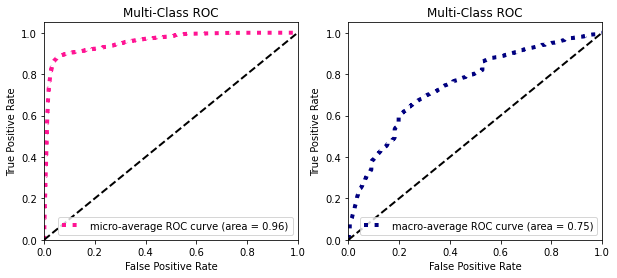

In [26]:
n_classes = 5

# Process of plotting roc-auc curve belonging to all classes.

from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC')
plt.legend(loc="lower right")

plt.subplot(122)
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC')
plt.legend(loc="lower right")
plt.show()

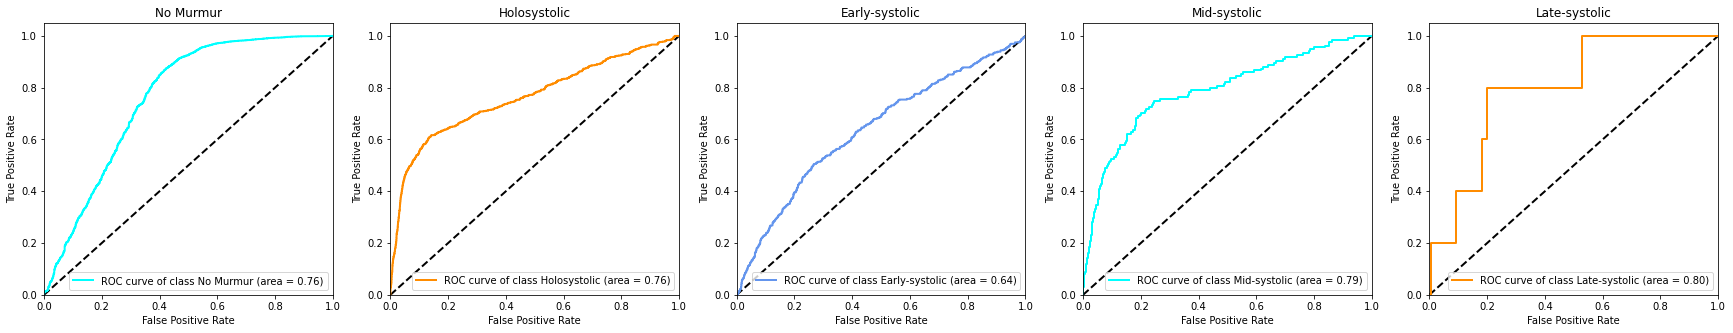

In [27]:
plt.close()
plt.figure(figsize=(30, 5))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
title = ['No Murmur', "Holosystolic", "Early-systolic", "Mid-systolic", "Late-systolic"]
for i, color in zip(range(n_classes), colors):
    if i == 0:
        plt.subplot(151)
    elif i == 1:
        plt.subplot(152)
    elif i == 2:
        plt.subplot(153)
    elif i == 3:
        plt.subplot(154)
    else:
        plt.subplot(155)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title[i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(title[i], roc_auc[i]))
    plt.legend(loc="lower right")
    
plt.show()